## Airbnb Listings Analysis | Multivariate Linear Regression with Sklearn

Datasets used: Listings and reviews for NYC on September 7th, 2022 from insideairbnb: http://insideairbnb.com/get-the-data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

Import the datafile from the clean dataset I provided, or download the datasets from the link above and follow the steps to clean it your self in the SQL script I provided in the directory.

In [85]:
df = pd.read_csv(f'C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\Tables\\clean_and_filtered_airbnb_data_v2.csv')
df.head()

,host_id,host_name,listing_id,listing_url,booked_out_of_30,booked_out_of_60,booked_out_of_90,booked_out_of_365,review_scores_rating_clean,instant_bookable_clean,...,bedrooms_clean,room_type,property_type,host_has_profile_pic_clean,host_identity_verified_clean,neighbourhood_cleansed,neighbourhood_group_cleansed,host_total_listings_count_clean,number_of_reviews_clean,dirty_review_count
0,8967,Shunichi,5178,https://www.airbnb.com/rooms/5178,28,56,83,205,4.23,0,...,1,Private room,Private room in rental unit,1,0,Midtown,Manhattan,1,550,52
1,17601262,Enrico,3495854,https://www.airbnb.com/rooms/3495854,25,39,46,46,4.69,0,...,1,Entire home/apt,Entire loft,1,1,Williamsburg,Brooklyn,2,218,40
2,277379,Agnes,58059,https://www.airbnb.com/rooms/58059,29,58,81,130,4.71,0,...,1,Private room,Private room in rental unit,1,1,Harlem,Manhattan,2,615,39
3,627217,Seith,126443,https://www.airbnb.com/rooms/126443,28,53,76,110,4.33,1,...,2,Entire home/apt,Entire townhouse,1,1,East Village,Manhattan,32,516,36
4,277379,Agnes,476983,https://www.airbnb.com/rooms/476983,30,55,78,271,4.64,0,...,1,Private room,Private room in rental unit,1,1,Harlem,Manhattan,2,607,33


In [86]:
df[['booked_out_of_90', 'number_of_reviews_clean', 'dirty_review_count', 'review_scores_rating_clean', 'instant_bookable_clean', 'price_clean', 'bedrooms_clean', 'host_identity_verified_clean']].describe().round(3)


,booked_out_of_90,number_of_reviews_clean,dirty_review_count,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,host_identity_verified_clean
count,1132.000,1132.000,1132.000,1132.000,1132.000,1132.000,1132.000,1132.000
mean,59.036,121.110,5.088,4.711,0.176,160.981,1.243,0.878
std,27.473,105.172,5.224,0.236,0.381,112.510,0.758,0.327
min,0.000,1.000,1.000,2.000,0.000,21.000,0.000,0.000
25%,37.000,42.000,2.000,4.610,0.000,90.000,1.000,1.000
50%,66.000,92.000,3.000,4.760,0.000,130.000,1.000,1.000
75%,84.000,172.000,7.000,4.870,0.000,195.000,1.000,1.000
max,90.000,617.000,52.000,5.000,1.000,900.000,5.000,1.000


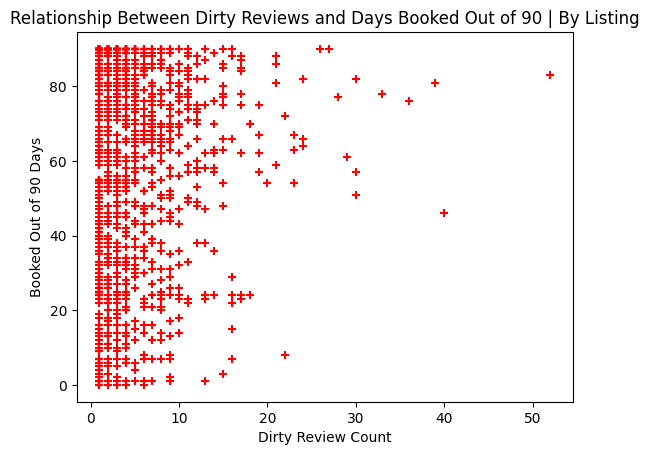

In [87]:
%matplotlib inline
plt.title('Relationship Between Dirty Reviews and Days Booked Out of 90 | By Listing')
plt.xlabel('Dirty Review Count')
plt.ylabel('Booked Out of 90 Days')
plt.scatter(df.dirty_review_count , df.booked_out_of_90, color ='red',marker='+')

## Relationship Between Dirty Review Count and Days Booked Out of 90

Single variable analysis with days booked out of 90 as the target (y) and count of dirty review as the only determining (x) factor

In [88]:
reg = linear_model.LinearRegression()
reg.fit(df[['dirty_review_count']],df.booked_out_of_90)

LinearRegression()

In [89]:
reg.predict([[0]])

c:\Users\riley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.32840291])

In [90]:
reg.coef_.round(3)

array([0.336])

In [91]:
reg.intercept_.round(3)

57.328

## Multivariable Linear Regression
Other numerical variables are added to the regression. The purpose of this is to bring endogenous variables out of the error term that impacts both days booked out of 90 and the number of dirty reviews a listing has.
For example, listings with more reviews may be more likely to be booked and also be more likely to have dirty reviews. While in the error term, number of reviews a lsiting has would positvely bias the beta coeefficent 
of dirty reviews feature (x) causing us to overstate its impact on bookings (y).

In [92]:
reg_1 = linear_model.LinearRegression()
reg_1.fit(df[['dirty_review_count', 'number_of_reviews_clean', 'bedrooms_clean', 'price_clean', 'review_scores_rating_clean', 'instant_bookable_clean', 'host_identity_verified_clean' ]], df.booked_out_of_90)

LinearRegression()

In [93]:
reg_1.coef_.round(3)

array([ 0.066,  0.018,  2.71 , -0.034, 10.619, -2.248,  2.28 ])

In [94]:
reg_1.intercept_

6.864656584511316

In [95]:
reg_1.predict([[30, 50, 1, 60, 4.2, 0, 1 ]]).round(3)

c:\Users\riley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.329])

## Dummy coding of categorical features using One-Hot-Encoding

First things first, features are dropped from the dataframe that will not be used in the analysis. The remaining categorical features will be tranformed into dummy variables later on.

In [96]:
df_1=df.drop(['listing_id', 'host_id', 'host_name', 'listing_url', 'booked_out_of_30', 'booked_out_of_60', 'booked_out_of_365', 'property_type', 'host_has_profile_pic_clean', 'neighbourhood_cleansed', 'host_total_listings_count_clean',], axis = 'columns')
df_1.head()

,booked_out_of_90,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,room_type,host_identity_verified_clean,neighbourhood_group_cleansed,number_of_reviews_clean,dirty_review_count
0,83,4.23,0,68,1,Private room,0,Manhattan,550,52
1,46,4.69,0,181,1,Entire home/apt,1,Brooklyn,218,40
2,81,4.71,0,60,1,Private room,1,Manhattan,615,39
3,76,4.33,1,459,2,Entire home/apt,1,Manhattan,516,36
4,78,4.64,0,59,1,Private room,1,Manhattan,607,33


Now seperate the features from the taeget variable (days_booked_out_of_90)

In [97]:
df_1_x =df_1.drop('booked_out_of_90', axis=1)
df_1_y = df_1['booked_out_of_90']


In [98]:
df_1_x.head()

,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,room_type,host_identity_verified_clean,neighbourhood_group_cleansed,number_of_reviews_clean,dirty_review_count
0,4.23,0,68,1,Private room,0,Manhattan,550,52
1,4.69,0,181,1,Entire home/apt,1,Brooklyn,218,40
2,4.71,0,60,1,Private room,1,Manhattan,615,39
3,4.33,1,459,2,Entire home/apt,1,Manhattan,516,36
4,4.64,0,59,1,Private room,1,Manhattan,607,33


In [99]:
df_1_y.head()

0    83
1    46
2    81
3    76
4    78
Name: booked_out_of_90, dtype: int64

Replace all categorical data with "dummy" variables through one-hot-encoding

Why? Sklearn linear regresison cant deal with categorical data, it need to be in numerical format. The easy way to achieve that is to create multiple columns, one for each, possible value of the categorical data.

Example: Neighbourhood_group with the values Brooklyn, Manhatten, Staten Island, & The Bronx replaced by columns for each distint value that appears. Then each row has a 1 or a zero depending on if the listing is in this particular neighbourhood as a characteristic. One of them can be left out of those columns to save redundant information, becasue if 4 of the 5 bouroughs are False then the only remaining possibility is that its in the final bourough

In [100]:
df_1_x_encoded = pd.get_dummies(df_1_x, drop_first=True)
df_1_x_encoded.head()

,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,host_identity_verified_clean,number_of_reviews_clean,dirty_review_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,4.23,0,68,1,0,550,52,0,1,0,0,1,0,0
1,4.69,0,181,1,1,218,40,0,0,0,1,0,0,0
2,4.71,0,60,1,1,615,39,0,1,0,0,1,0,0
3,4.33,1,459,2,1,516,36,0,0,0,0,1,0,0
4,4.64,0,59,1,1,607,33,0,1,0,0,1,0,0


Thats it for pre-processing.

Next we will train the model, and find our coefficent for the feature of interest(dirty_review_count), p-value, and overall model fit (r^2) to determine its impact on bookings.




In [101]:
from sklearn.linear_model import LinearRegression
reg_2 = LinearRegression()


In [102]:
reg_2.fit(df_1_x_encoded, df_1_y)

LinearRegression()

In [103]:
reg_2.predict([[4.5, 0, 80, 1, 1, 65, 10, 0,0,0, 0, 0,0,0]])

c:\Users\riley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.76177017])

In [109]:
reg_2.coef_.round(3)

array([ 1.4363e+01, -1.0970e+00, -7.1000e-02,  3.5060e+00,  1.0330e+00,
        2.1000e-02, -3.6000e-02, -3.4775e+01, -1.1129e+01, -2.4923e+01,
        1.9532e+01,  2.4676e+01,  7.7760e+00, -2.2580e+00])

The coefficent for our feature of interest, dirty_review_count is -.036. This means that we can predict each dirty review will impact days booked out of 90 by -.036 days booked on average.

In [105]:
reg_2.score(df_1_x_encoded,df_1_y).round(3)

0.127

The overall model fit (r^2) is .127 or 12.7%. Our model predicts 12.7% of the data of the data set.

In [106]:
df_1_x_encoded_2 = pd.get_dummies(df_1, drop_first = True)
df_1_x_encoded_2.head()

,booked_out_of_90,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,host_identity_verified_clean,number_of_reviews_clean,dirty_review_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,83,4.23,0,68,1,0,550,52,0,1,0,0,1,0,0
1,46,4.69,0,181,1,1,218,40,0,0,0,1,0,0,0
2,81,4.71,0,60,1,1,615,39,0,1,0,0,1,0,0
3,76,4.33,1,459,2,1,516,36,0,0,0,0,1,0,0
4,78,4.64,0,59,1,1,607,33,0,1,0,0,1,0,0


In [107]:
corr_df = pd.DataFrame(columns=['r', 'p'])


for col in df_1_x_encoded_2:
    if pd.api.types.is_numeric_dtype(df_1_x_encoded_2[col]) and col != 'booked_out_of_90':
        r, p = stats.pearsonr(df_1_x_encoded_2.booked_out_of_90, df_1_x_encoded_2[col])
        corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df

,r,p
review_scores_rating_clean,0.091,0.002
instant_bookable_clean,-0.033,0.265
price_clean,-0.099,0.001
bedrooms_clean,0.021,0.475
host_identity_verified_clean,0.016,0.602
number_of_reviews_clean,0.098,0.001
dirty_review_count,0.064,0.032
room_type_Hotel room,-0.073,0.014
room_type_Private room,-0.108,0.000
room_type_Shared room,-0.053,0.074


The p-value of dirty_review_count impact on days_booked_out_of_90 is 0.032. At this p-value we can cocnlude that dirty_review_count's impact on bookings is statistically significant at the 95% confidence level. 

We are 95% confident that dirty_reviews_count's impact on days booked_out_of_90 is -0.036 days per dirty review.